In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
y = pd.read_csv('/content/DATASET.csv')
df = y.iloc[:4000]
df.head()

,Timestamp,Memory usage [MB]
0,05.11.2015 00:00:00,1026
1,05.11.2015 00:05:00,1070
2,05.11.2015 00:10:00,1001
3,05.11.2015 00:15:00,969
4,05.11.2015 00:20:00,1103


In [ ]:
df.columns = ['Time','Request']
df['Time'] = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.columns = ['ds','y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


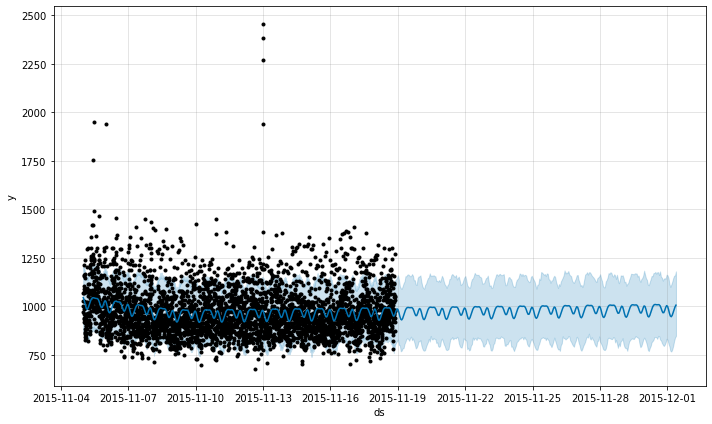

In [ ]:
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

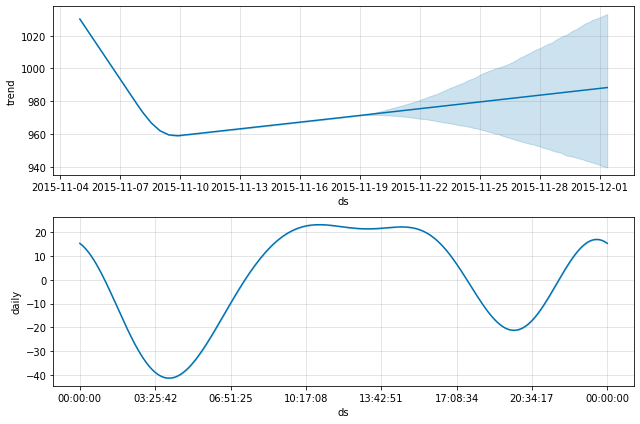

In [ ]:
fig = m.plot_components(fcst)


In [ ]:
fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4295,2015-12-01 05:15:00,988.135882,778.211906,1127.215737,940.239470,1032.330301,-33.678821,-33.678821,-33.678821,-33.678821,-33.678821,-33.678821,0.0,0.0,0.0,954.457061
4296,2015-12-01 06:15:00,988.193140,795.962705,1145.463439,940.099808,1032.555731,-19.542154,-19.542154,-19.542154,-19.542154,-19.542154,-19.542154,0.0,0.0,0.0,968.650986
4297,2015-12-01 07:15:00,988.250398,821.280299,1158.420556,939.960146,1032.781162,-3.900567,-3.900567,-3.900567,-3.900567,-3.900567,-3.900567,0.0,0.0,0.0,984.349831
4298,2015-12-01 08:15:00,988.307656,839.513595,1159.657280,939.708489,1032.994336,9.342921,9.342921,9.342921,9.342921,9.342921,9.342921,0.0,0.0,0.0,997.650577
4299,2015-12-01 09:15:00,988.364914,847.975830,1180.629721,939.592041,1033.198936,18.238368,18.238368,18.238368,18.238368,18.238368,18.238368,0.0,0.0,0.0,1006.603282


In [ ]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4295,2015-12-01 05:15:00,954.457061,778.211906,1127.215737
4296,2015-12-01 06:15:00,968.650986,795.962705,1145.463439
4297,2015-12-01 07:15:00,984.349831,821.280299,1158.420556
4298,2015-12-01 08:15:00,997.650577,839.513595,1159.657280
4299,2015-12-01 09:15:00,1006.603282,847.975830,1180.629721


In [ ]:
test.tail()

,Timestamp,Memory usage [MB]
4995,22.11.2015 08:15:00,854
4996,22.11.2015 08:20:00,881
4997,22.11.2015 08:25:00,969
4998,22.11.2015 08:30:00,955
4999,22.11.2015 08:35:00,890


In [ ]:
plot_plotly(m ,fcst)
plot_components_plotly(m, fcst)


In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = fcst.iloc[-1000:]['yhat']
print(predictions)

3300     990.884204
3301     990.860854
3302     990.823409
3303     990.773325
3304     990.712081
           ...     
4295     954.457061
4296     968.650986
4297     984.349831
4298     997.650577
4299    1006.603282
Name: yhat, Length: 1000, dtype: float64


In [ ]:
test = y.iloc[4000:5000]

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['Memory usage [MB]']))
print("Mean Value of Test Dataset:", test['Memory usage [MB]'].mean())


Root Mean Squared Error between actual and  predicted values:  133.88992676881188
Mean Value of Test Dataset: 976.877
